In [2]:
import pandas

# Open and read the CSV file, keep only the rows with column 'device_code' cells of names, HKU, HKn, TST, AP, iObs, KP, SH, Cap, TBT, MP, FKYC, LHY.
df = pandas.read_csv(r"C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_October_2024.csv")

print(df.shape)

df = df[df['device_code'].isin(['HKU', 'HKn', 'TST', 'AP', 'iObs', 'KP', 'SH', 'Cap', 'TBT', 'MP', 'FKYC', 'LHY'])]

print(df.shape)
print(df.head())

(1048575, 11)
(390111, 11)
           id        created  received_utc received_adjusted  \
0   196467432  9/30/24 20:00  10/1/24 0:00      10/1/24 8:00   
1   196467433  9/30/24 20:00  10/1/24 0:00      10/1/24 8:00   
2   196467434  9/30/24 20:00  10/1/24 0:00      10/1/24 8:00   
9   196467440  9/30/24 20:00  10/1/24 0:00      10/1/24 8:00   
11  196467442  9/30/24 20:00  10/1/24 0:00      10/1/24 8:00   

    sqmle_serial_number  nsb  sensor_frequency  sensor_period_count  \
0                   736  5.7          378672.0                  0.0   
1                  1102  0.0          717372.0                  0.0   
2                  1106  0.0          522194.0                  0.0   
9                  4780  0.0          576917.0                  0.0   
11                  977  0.0          559468.0                  0.0   

    sensor_period_second  temperature device_code  
0                    0.0         41.2         HKn  
1                    0.0         46.0          AP  
2    

C:\Users\cxoox\AppData\Local\Temp\ipykernel_26060\802569966.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['received_adjusted'] = df['received_adjusted'].dt.floor('15T')


0         2024-10-01 08:00:00
1         2024-10-01 08:00:00
2         2024-10-01 08:00:00
9         2024-10-01 08:00:00
11        2024-10-01 08:00:00
                  ...        
1048561   2024-10-19 08:45:00
1048562   2024-10-19 08:45:00
1048563   2024-10-19 08:45:00
1048571   2024-10-19 08:45:00
1048572   2024-10-19 08:45:00
Name: received_adjusted, Length: 390111, dtype: datetime64[ns]


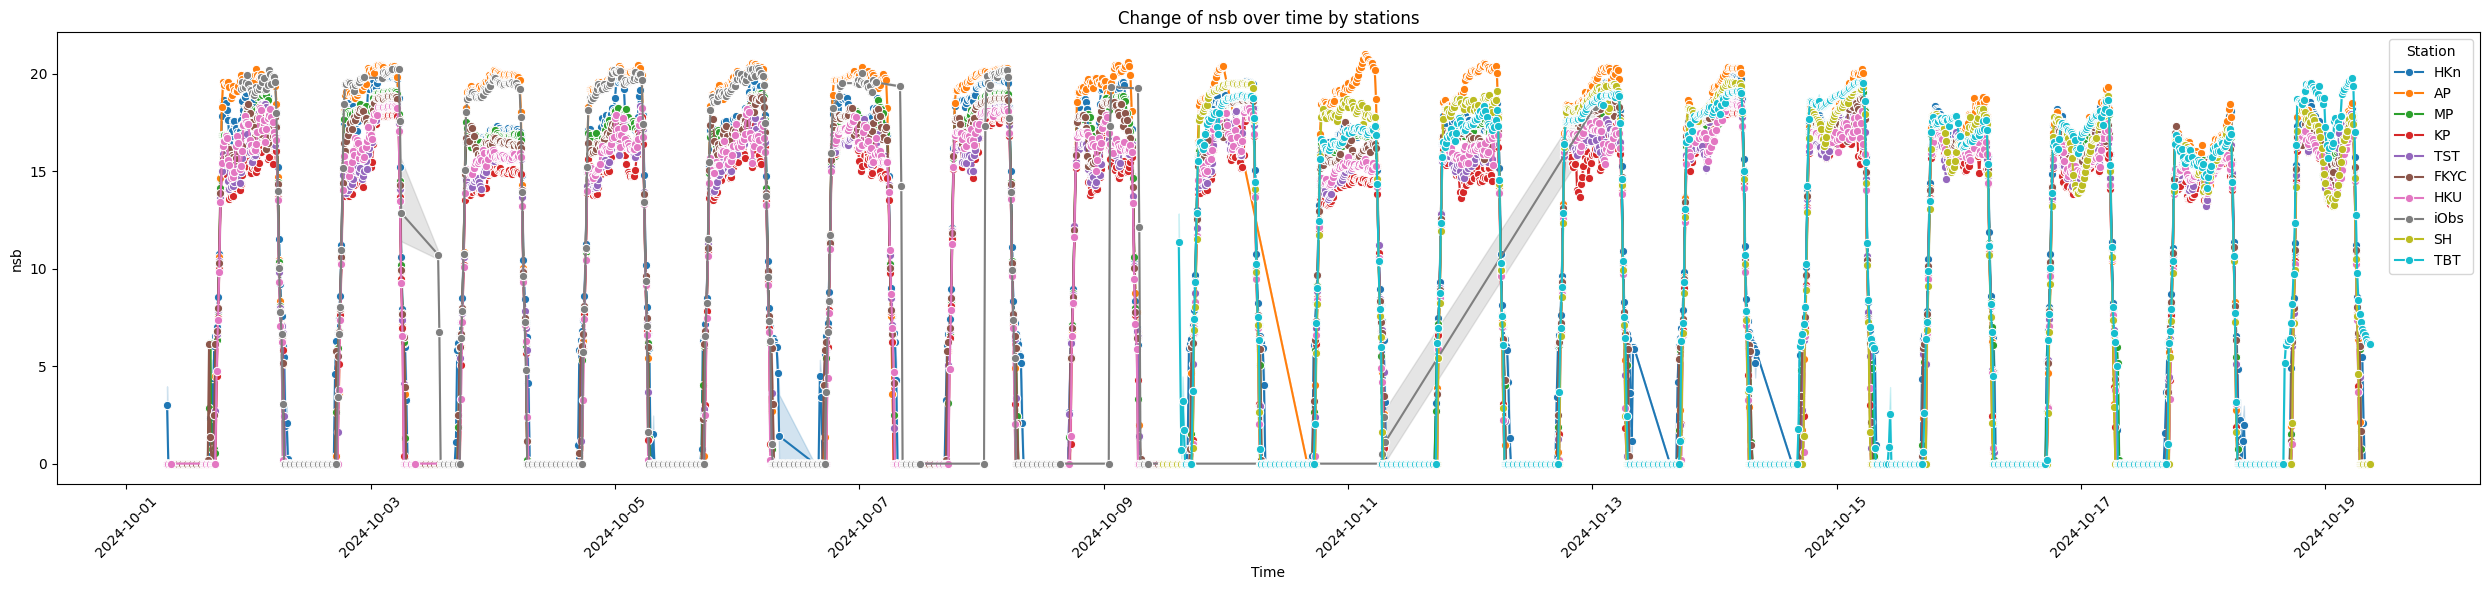

In [5]:
# Plot a line graph showing the change of nsb over time by stations, "nsb" is the column of nsb informaton, "received_adjusted" is the column of time information
# 'device_code' is the column of station names, use the data of every 15 minutes, since the data is collected every minute

# Filter the data to keep only the rows with 'received_adjusted' values that are multiples of 15 minutes
df['received_adjusted'] = pandas.to_datetime(df['received_adjusted'])
df['received_adjusted'] = df['received_adjusted'].dt.floor('15T')

print(df['received_adjusted'])

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.lineplot(data=df, x='received_adjusted', y='nsb', hue='device_code', marker='o')
plt.title('Change of nsb over time by stations')
plt.xlabel('Time')
plt.ylabel('nsb')
plt.xticks(rotation=45)
plt.legend(title='Station')
plt.tight_layout()
#plt.savefig('nsb_over_time_by_stations.png')
plt.show()

In [ ]:
import pandas as pd
import os

# Create a new dataframe to store the filtered data
filtered_df = pd.DataFrame()

# Read the csv files in the directory
directory = '/Users/oscarzhang/Desktop/sky_brightness'
for file in os.listdir(directory):
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    # Filter the data to keep only the rows with 'received_adjusted' values that are multiples of 1 hour
    df['received_adjusted'] = pd.to_datetime(df['received_adjusted'])
    df['received_adjusted'] = df['received_adjusted'].dt.floor('1H')
    # Filter the data to keep only the rows with 'device_code' values that are in the specified list
    df = df[df['device_code'].isin(['HKU', 'HKn', 'TST', 'AP', 'iObs', 'KP', 'SH', 'Cap', 'TBT', 'MP', 'FKYC', 'LHY'])]
    # Append the filtered data to the new dataframe
    filtered_df = pd.concat([filtered_df, df], ignore_index=True)
    
print(filtered_df.shape)
print(filtered_df.head())


/var/folders/7p/93y6v2fx4bdgy95t51symnp00000gn/T/ipykernel_2839/1392673998.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['received_adjusted'] = df['received_adjusted'].dt.floor('15T')
/var/folders/7p/93y6v2fx4bdgy95t51symnp00000gn/T/ipykernel_2839/1392673998.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['received_adjusted'] = df['received_adjusted'].dt.floor('15T')
/var/folders/7p/93y6v2fx4bdgy95t51symnp00000gn/T/ipykernel_2839/1392673998.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['received_adjusted'] = df['received_adjusted'].dt.floor('15T')
/var/folders/7p/93y6v2fx4bdgy95t51symnp00000gn/T/ipykernel_2839/1392673998.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please sp

(7919583, 11)
          id              created         received_utc   received_adjusted  \
0  181224751  2024-02-29 19:00:12  2024-03-01 00:00:03 2024-03-01 08:00:00   
1  181224757  2024-02-29 19:00:12  2024-03-01 00:00:06 2024-03-01 08:00:00   
2  181224762  2024-02-29 19:00:18  2024-03-01 00:00:14 2024-03-01 08:00:00   
3  181224765  2024-02-29 19:00:18  2024-03-01 00:00:15 2024-03-01 08:00:00   
4  181224766  2024-02-29 19:00:42  2024-03-01 00:00:18 2024-03-01 08:00:00   

   sqmle_serial_number   nsb  sensor_frequency  sensor_period_count  \
0                 1102  0.00          713966.0                  0.0   
1                 1108  5.77          369034.0                  0.0   
2                  977  0.00          559724.0                  0.0   
3                  806  0.00          511560.0                  0.0   
4                 1106  0.00          473400.0                  0.0   

   sensor_period_second  temperature device_code  
0                   0.0         27.3   

In [ ]:
import pandas as pd
import os

# Corrected directory path for Windows
directory = r"C:\Users\cxoox\Desktop\sky_brightness"

if not os.path.exists(directory):
    print(f"Directory does not exist: {directory}")
else:
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        
        #df = df[df['device_code'].isin(['HKU', 'HKn', 'TST', 'AP', 'iObs', 'KP', 'SH', 'Cap', 'TBT', 'MP', 'FKYC', 'LHY'])]
        df = df[df['device_code'].isin(['KP'])]
        
        # Filter the data
        # Convert 'received_adjusted' to datetime, time example is "1/3/2024 08:00:03" , 24-hourse, and select only the rows with 'received_adjusted' values that are multiples of 1 hour
        
        try:
            df['received_adjusted'] = pd.to_datetime(df['received_adjusted'], format='%d/%m/%Y %H:%M:%S')
        except:
            df['received_adjusted'] = pd.to_datetime(df['received_adjusted'], format='%Y-%m-%d %H:%M:%S')
            # Select only the rows with 'received_adjusted' values that are, for example, "1/3/2024 08:00:03" , "1/3/2024 09:00:24", "1/3/2024 18:00:66" 
            # and select only the rows with 'device_code' values that are in the specified list
            
            df = df[df['received_adjusted'].dt.minute == 0]
            
            
            # Save the filtered data
            filtered_file_path = os.path.join(r"C:\Users\cxoox\Desktop\filtered_data", f"filtered_{file}")
            df.to_csv(filtered_file_path, index=False)
            print(f"Filtered data saved to {filtered_file_path}")
        

Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2023_11.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2023_12.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_01.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_02.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_03.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_04.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_05.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_06.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_07.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_08.csv
Filtered data saved to C:\Users\cxoox\Desktop\filtered_data\filtered_GaN-MN_2024_09.csv


ValueError: time data "10/1/24 8:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [18]:
import pandas as pd
import os

# Corrected directory path for Windows
directory = r"C:\Users\cxoox\Desktop\sky_brightness"
output_dir = r"C:\Users\cxoox\Desktop\filtered_data"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Create an empty DataFrame to store all filtered data
combined_filtered_df = pd.DataFrame()

if not os.path.exists(directory):
    print(f"Directory does not exist: {directory}")
else:
    for file in os.listdir(directory):
        if not file.endswith('.csv'):
            continue
            
        file_path = os.path.join(directory, file)
        print(f"Processing file: {file_path}")  # Debug print
        
        try:
            df = pd.read_csv(file_path)
            
            # Debug: print columns and sample data
            print(f"Columns in file: {df.columns}")
            print(f"Sample data:\n{df.head()}")
            
            # Filter by device_code
            df = df[df['device_code'].isin(['KP'])]
            
            # Try multiple datetime formats
            for fmt in ['%d/%m/%y %H:%M', '%Y-%m-%d %H:%M:%S', '%m/%d/%Y %H:%M:%S', '%d-%m-%Y %H:%M:%S']:
                try:
                    df['received_adjusted'] = pd.to_datetime(df['received_adjusted'], format=fmt)
                    break
                except:
                    continue
            
            # Check if datetime conversion succeeded
            if 'received_adjusted' not in df or pd.api.types.is_datetime64_any_dtype(df['received_adjusted']) is False:
                print(f"Datetime conversion failed for file: {file_path}")
                continue
                
            # Filter to keep only whole-hour observations
            df = df[df['received_adjusted'].dt.minute == 0]
            
            # Debug: print filtered data
            print(f"Filtered data count: {len(df)}")
            if len(df) > 0:
                print(f"Date range in filtered data: {df['received_adjusted'].min()} to {df['received_adjusted'].max()}")
            
            # Append the filtered data to the combined DataFrame
            combined_filtered_df = pd.concat([combined_filtered_df, df], ignore_index=True)
            
        except Exception as e:
            print(f"Error processing file {file_path}: {str(e)}")
            continue

# Remove duplicates based on all columns
combined_filtered_df = combined_filtered_df.drop_duplicates()

# Only keep "received_adjusted" and "nsb" columns
combined_filtered_df = combined_filtered_df[['received_adjusted', 'nsb']]

# There are two consecutive detections in a short time, for example, "1/3/2024 08:00:03" and "1/3/2024 08:00:24", remove the second one
combined_filtered_df = combined_filtered_df.sort_values(by=['received_adjusted'])
combined_filtered_df = combined_filtered_df[~combined_filtered_df.duplicated(subset=['received_adjusted'], keep='first')]


# Or more specifically, remove duplicates based on datetime and device_code
# combined_filtered_df = combined_filtered_df.drop_duplicates(subset=['received_adjusted', 'device_code'])

# Save the combined filtered data to a single CSV file
output_file_path = os.path.join(output_dir, "combined_filtered2.csv")
combined_filtered_df.to_csv(output_file_path, index=False)
print(f"Combined filtered data saved to {output_file_path}")
print(f"Total records saved: {len(combined_filtered_df)}")
print(f"Date range in final data: {combined_filtered_df['received_adjusted'].min()} to {combined_filtered_df['received_adjusted'].max()}")

Processing file: C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2023_10.csv
Columns in file: Index(['id', 'created', 'received_utc', 'received_adjusted',
       'sqmle_serial_number', 'nsb', 'sensor_frequency', 'sensor_period_count',
       'sensor_period_second', 'temperature', 'device_code'],
      dtype='object')
Sample data:
          id              created         received_utc    received_adjusted  \
0  168992795  2023-09-30 20:00:13  2023-10-01 00:00:03  2023-10-01 13:00:03   
1  168992796  2023-09-30 20:00:13  2023-10-01 00:00:03  2023-10-01 08:00:03   
2  168992797  2023-09-30 20:00:13  2023-10-01 00:00:04  2023-09-30 19:00:04   
3  168992798  2023-09-30 20:00:13  2023-10-01 00:00:04  2023-10-01 08:00:04   
4  176345231  2024-01-03 01:52:38  2023-10-01 00:00:05  2023-09-30 19:00:05   

   sqmle_serial_number    nsb  sensor_frequency  sensor_period_count  \
0                 5601   0.00          600584.0                  0.0   
1                 1102   0.00          717066.0     

In [17]:
import pandas as pd
import os

directory = r"C:\Users\cxoox\Desktop\sky_brightness"
output_dir = r"C:\Users\cxoox\Desktop\filtered_data"

os.makedirs(output_dir, exist_ok=True)
combined_filtered_df = pd.DataFrame()

if not os.path.exists(directory):
    print(f"Directory does not exist: {directory}")
else:
    for file in os.listdir(directory):
        if not file.endswith('.csv'):
            continue
            
        file_path = os.path.join(directory, file)
        print(f"Processing {file_path}")
        
        try:
            df = pd.read_csv(file_path)
            df = df[df['device_code'].isin(['KP'])]  # Filter device
            
            # Parse datetime with multiple format attempts
            for fmt in ['%d/%m/%Y %H:%M:%S', '%m/%d/%Y %H:%M:%S', 
                       '%d/%m/%y %H:%M', '%Y-%m-%d %H:%M:%S']:
                try:
                    df['received_adjusted'] = pd.to_datetime(df['received_adjusted'], format=fmt)
                    break
                except:
                    continue
            
            if not pd.api.types.is_datetime64_any_dtype(df['received_adjusted']):
                print(f"Datetime parsing failed in {file}")
                continue
                
            # Sort by timestamp
            df = df.sort_values('received_adjusted')
            
            # Create hour-level grouping key
            df['hour_group'] = df['received_adjusted'].dt.strftime('%Y-%m-%d %H:00')
            
            # Keep first observation in each hour group
            df = df.drop_duplicates(subset=['hour_group'], keep='first')
            
            combined_filtered_df = pd.concat([combined_filtered_df, df], ignore_index=True)
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

# Final cleanup
combined_filtered_df = combined_filtered_df.drop(columns=['hour_group'])  # Remove helper column
combined_filtered_df = combined_filtered_df.drop_duplicates()  # Safety check

# Only keep "received_adjusted" and "nsb" columns
combined_filtered_df = combined_filtered_df[['received_adjusted', 'nsb']]

# Save results
output_path = os.path.join(output_dir, "combined_filtered.csv")
combined_filtered_df.to_csv(output_path, index=False)
print(f"Saved {len(combined_filtered_df)} records to {output_path}")

Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2023_10.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2023_11.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2023_12.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_01.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_02.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_03.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_04.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_05.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_06.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_07.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_08.csv
Processing C:\Users\cxoox\Desktop\sky_brightness\GaN-MN_2024_09.csv
Saved 8760 records to C:\Users\cxoox\Desktop\filtered_data\combined_filtered.csv


In [72]:
import pandas as pd

# 1. Load the combined filtered data
combined_filtered_df = pd.read_csv(r"C:\Users\cxoox\Desktop\filtered_data\combined_filtered.csv")

# Convert the 'received_adjusted' column to a date column, handling invalid values
combined_filtered_df['date'] = pd.to_datetime(
    combined_filtered_df['received_adjusted'],
    errors='coerce'  # Convert invalid dates to NaT
).dt.date

# Drop rows with invalid dates (if any)
combined_filtered_df = combined_filtered_df.dropna(subset=['date'])

# 2. Load the daily mean cloud cover data
cloud_cover_df = pd.read_csv(
    r"C:\Users\cxoox\Downloads\daily_HKO_CLD_ALL.csv",
    skiprows=2,
    header=0,
    usecols=["年/Year", "月/Month", "日/Day", "數值/Value"]
)

# Rename columns for easier handling
cloud_cover_df = cloud_cover_df.rename(columns={
    "年/Year": "Year",
    "月/Month": "Month",
    "日/Day": "Day",
    "數值/Value": "Daily Mean Cloud Cover (%)"
})

# Convert Year, Month, and Day to integers, handling invalid values
for col in ["Year", "Month", "Day"]:
    cloud_cover_df[col] = pd.to_numeric(cloud_cover_df[col], errors='coerce').astype('Int64')  # Int64 supports NaN

# Combine Year, Month, and Day into a single date column, handling invalid values
cloud_cover_df['date'] = pd.to_datetime(
    cloud_cover_df[["Year", "Month", "Day"]].astype(str).agg("-".join, axis=1),
    format="%Y-%m-%d",
    errors='coerce'  # Convert invalid dates to NaT
).dt.date

# Drop rows with invalid dates (if any)
cloud_cover_df = cloud_cover_df.dropna(subset=['date'])

# 3. Check the date ranges
print("Combined Filtered DataFrame Date Range:", combined_filtered_df['date'].min(), "to", combined_filtered_df['date'].max())
print("Cloud Cover DataFrame Date Range:", cloud_cover_df['date'].min(), "to", cloud_cover_df['date'].max())

# 4. Merge the data
merged_df = pd.merge(
    combined_filtered_df,
    cloud_cover_df[['date', 'Daily Mean Cloud Cover (%)']],
    on='date',
    how='left'
)

# 5. Save the merged data
output_file_path = r"C:\Users\cxoox\Desktop\filtered_data\merged_with_cloud_cover.csv"
merged_df.to_csv(output_file_path, index=False)
print(f"Merge completed! Data saved to {output_file_path}")
print("First 5 rows of the merged data:")
print(merged_df.head())

Combined Filtered DataFrame Date Range: 2023-10-01 to 2024-10-01
Cloud Cover DataFrame Date Range: 1949-01-01 to 2025-03-31
Merge completed! Data saved to C:\Users\cxoox\Desktop\filtered_data\merged_with_cloud_cover.csv
First 5 rows of the merged data:
     received_adjusted  nsb        date  Daily Mean Cloud Cover (%)
0  2023-10-01 08:00:10  0.0  2023-10-01                        68.0
1  2023-10-01 09:00:10  0.0  2023-10-01                        68.0
2  2023-10-01 10:00:10  0.0  2023-10-01                        68.0
3  2023-10-01 11:00:10  0.0  2023-10-01                        68.0
4  2023-10-01 12:00:10  0.0  2023-10-01                        68.0


In [75]:
import pandas as pd

# 1. Load the combined filtered data
combined_filtered_df = pd.read_csv(r"C:\Users\cxoox\Desktop\filtered_data\merged_with_cloud_cover.csv")

# Convert the 'received_adjusted' column to a date column, handling invalid values
combined_filtered_df['date'] = pd.to_datetime(
    combined_filtered_df['received_adjusted'],
    errors='coerce'  # Convert invalid dates to NaT
).dt.date

# Drop rows with invalid dates (if any)
combined_filtered_df = combined_filtered_df.dropna(subset=['date'])

# 2. Load the daily mean cloud cover data
evaporation_df = pd.read_csv(
    r"C:\Users\cxoox\Downloads\daily_KP_EVAP_ALL.csv",
    skiprows=2,
    header=0,
    usecols=["年/Year", "月/Month", "日/Day", "數值/Value"]
)

# Rename columns for easier handling
evaporation_df = evaporation_df.rename(columns={
    "年/Year": "Year",
    "月/Month": "Month",
    "日/Day": "Day",
    "數值/Value": "Daily Total Evaporation (mm)"
})

# Convert Year, Month, and Day to integers, handling invalid values
for col in ["Year", "Month", "Day"]:
    evaporation_df[col] = pd.to_numeric(evaporation_df[col], errors='coerce').astype('Int64')  # Int64 supports NaN

# Combine Year, Month, and Day into a single date column, handling invalid values
evaporation_df['date'] = pd.to_datetime(
    evaporation_df[["Year", "Month", "Day"]].astype(str).agg("-".join, axis=1),
    format="%Y-%m-%d",
    errors='coerce'  # Convert invalid dates to NaT
).dt.date

# Drop rows with invalid dates (if any)
evaporation_df = evaporation_df.dropna(subset=['date'])

# 3. Check the date ranges
print("Combined Filtered DataFrame Date Range:", combined_filtered_df['date'].min(), "to", combined_filtered_df['date'].max())
print("Cloud Cover DataFrame Date Range:", evaporation_df['date'].min(), "to", evaporation_df['date'].max())

# 4. Merge the data
merged_df = pd.merge(
    combined_filtered_df,
    evaporation_df[['date', 'Daily Total Evaporation (mm)']],
    on='date',
    how='left'
)

# 5. Save the merged data
output_file_path = r"C:\Users\cxoox\Desktop\filtered_data\merged_with_cloud_cover2.csv"
merged_df.to_csv(output_file_path, index=False)
print(f"Merge completed! Data saved to {output_file_path}")
print("First 5 rows of the merged data:")
print(merged_df.head())

Combined Filtered DataFrame Date Range: 2023-10-01 to 2024-10-01
Cloud Cover DataFrame Date Range: 1968-01-01 to 2025-03-31
Merge completed! Data saved to C:\Users\cxoox\Desktop\filtered_data\merged_with_cloud_cover2.csv
First 5 rows of the merged data:
     received_adjusted  nsb        date  Daily Mean Cloud Cover (%)  \
0  2023-10-01 08:00:10  0.0  2023-10-01                        68.0   
1  2023-10-01 09:00:10  0.0  2023-10-01                        68.0   
2  2023-10-01 10:00:10  0.0  2023-10-01                        68.0   
3  2023-10-01 11:00:10  0.0  2023-10-01                        68.0   
4  2023-10-01 12:00:10  0.0  2023-10-01                        68.0   

  Daily Total Evaporation (mm)  
0                          4.8  
1                          4.8  
2                          4.8  
3                          4.8  
4                          4.8  
